###  DEMAPP04

# Uniform-node and Chebyshev-node polynomial approximation of Runge's function and compute condition numbers of associated interpolation matrices

In [1]:
from demos.setup import np, plt, demo
from numpy.linalg import norm, cond
from compecon import BasisChebyshev
import warnings
%matplotlib inline

warnings.simplefilter('ignore')

### Runge function

In [2]:
runge = lambda x: 1 / (1 + 25 * x ** 2)

Set points of approximation interval

In [3]:
a, b = -1, 1

Construct plotting grid

In [4]:
nplot = 1001
x = np.linspace(a, b, nplot)
y = runge(x)

Plot Runge's Function

Initialize data matrices

In [5]:
n = np.arange(3, 33, 2)
nn = n.size
errunif, errcheb = (np.zeros([nn, nplot]) for k in range(2))
nrmunif, nrmcheb, conunif, concheb = (np.zeros(nn) for k in range(4))

Compute approximation errors on refined grid and interpolation matrix condition numbers

In [6]:
for i in range(nn):
    # Uniform-node monomial-basis approximant
    xnodes = np.linspace(a, b, n[i])
    c = np.polyfit(xnodes, runge(xnodes), n[i])
    yfit = np.polyval(c, x)
    phi = xnodes.reshape(-1, 1) ** np.arange(n[i])

    errunif[i] = yfit - y
    nrmunif[i] = np.log10(norm(yfit - y, np.inf))
    conunif[i] = np.log10(cond(phi, 2))

In [7]:
for i in range(nn):
    # Uniform-node monomial-basis approximant
    xnodes = np.linspace(a, b, n[i])
    c = np.polyfit(xnodes, runge(xnodes), n[i])
    yfit = np.polyval(c, x)
    phi = xnodes.reshape(-1, 1) ** np.arange(n[i])

    errunif[i] = yfit - y
    nrmunif[i] = np.log10(norm(yfit - y, np.inf))
    conunif[i] = np.log10(cond(phi, 2))

    # Chebychev-node Chebychev-basis approximant
    yapprox = BasisChebyshev(n[i], a, b, f=runge)
    yfit = yapprox(x)  # [0] no longer needed?  # index zero is to eliminate one dimension
    phi = yapprox.Phi()
    errcheb[i] = yfit - y
    nrmcheb[i] = np.log10(norm(yfit - y, np.inf))
    concheb[i] = np.log10(cond(phi, 2))

Plot Chebychev- and uniform node polynomial approximation errors

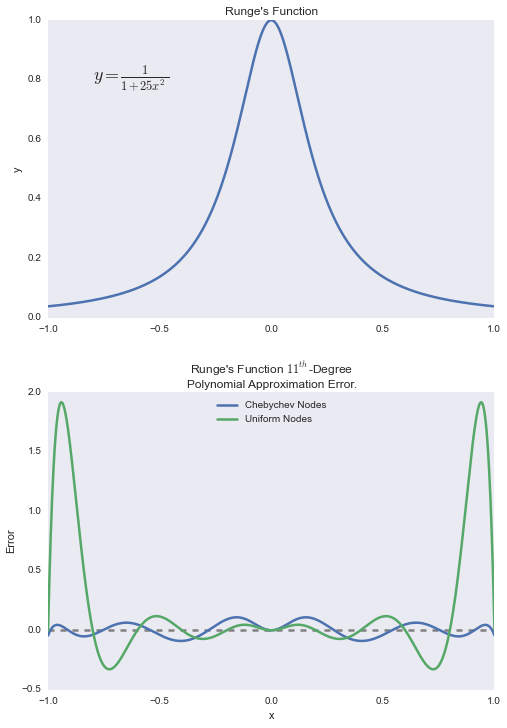

In [8]:
plt.figure(figsize=[8, 12])
demo.subplot(2,1,1, "Runge's Function", '', 'y')
plt.plot(x, y)
plt.text(-0.8, 0.8, r'$y = \frac{1}{1+25x^2}$', fontsize=18)
plt.xticks=[]

demo.subplot(2,1,2, "Runge's Function $11^{th}$-Degree\nPolynomial Approximation Error.",
             'x', 'Error')
plt.hlines(0, a, b, 'gray', '--')
plt.plot(x, errcheb[4], label='Chebychev Nodes')
plt.plot(x, errunif[4], label='Uniform Nodes')
plt.legend(loc='upper center')

Plot approximation error per degree of approximation

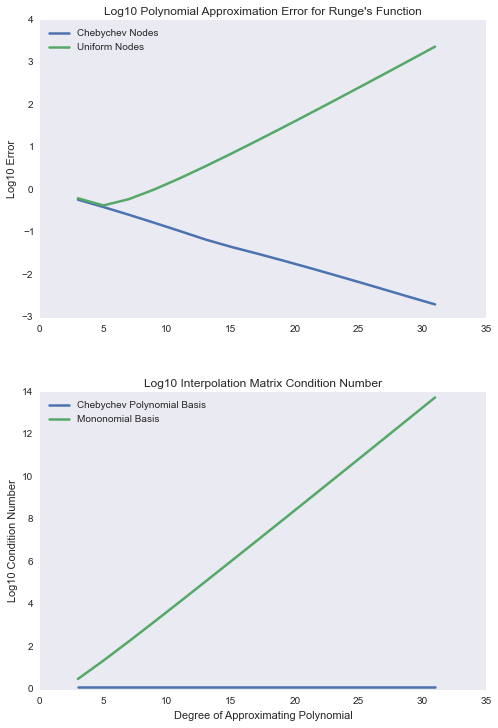

In [9]:
plt.figure(figsize=[8, 12])
demo.subplot(2,1,1, "Log10 Polynomial Approximation Error for Runge's Function",
             '', 'Log10 Error')
plt.plot(n, nrmcheb, label='Chebychev Nodes')
plt.plot(n, nrmunif, label='Uniform Nodes')
plt.legend(loc='upper left')
plt.xticks=[]

demo.subplot(2,1,2, "Log10 Interpolation Matrix Condition Number",
             'Degree of Approximating Polynomial', 'Log10 Condition Number')
plt.plot(n, concheb, label='Chebychev Polynomial Basis')
plt.plot(n, conunif, label='Mononomial Basis')
plt.legend(loc='upper left')